## Some basic introductory EDA

## Intro

Import all the necessary libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

### Basic Dataset Inspection

We will begin by doing some basic exploration on our data. Observe the dataset size and shape, see the relevant features
and look for any


In [3]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


The dataset is pretty simple. We have 3 columns for the train dataset, basically just the question text
and the target class. 0 being sincere questions and 1 insincere ones

In [5]:
train_df.shape

(1306122, 3)

In [6]:
test_df.shape

(375806, 2)

Our train dataset consists of 1,306,122 rows, while out test dataset sits at 375,806. Making the train/test
split of the data at roughly around 75%/25%

#### Data cleaning and null values


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375806 entries, 0 to 375805
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            375806 non-null  object
 1   question_text  375806 non-null  object
dtypes: object(2)
memory usage: 5.7+ MB


In [9]:
train_df[train_df['question_text'] == ''].index

Int64Index([], dtype='int64')

In [10]:
test_df[test_df['question_text'] == ''].index


Int64Index([], dtype='int64')

We can observe that our dataset is clean, we have no null values nor empty strings
in either our train or test data set

#### Class distribution
At this point we should check how the data is distributed across the target classes

In [11]:
# # take a subset of train data
# train_df = train_df.sample(n=1000)
# train_df.shape

Text(0.5, 0, 'Class')

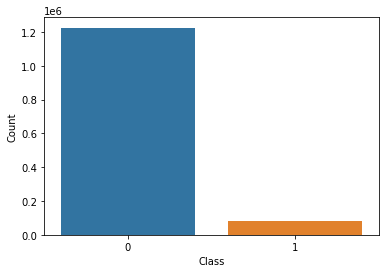

In [12]:
sns.countplot(train_df['target'])
plt.ylabel("Count")
plt.xlabel("Class")

In [13]:
sincere_count  = len(train_df[train_df.target == 0])
insincere_count = len(train_df[train_df.target == 1])

sincere_percentage = (sincere_count / len(train_df)) * 100
insincere_percentage = (insincere_count/ len(train_df)) * 100

print(f"There are {sincere_count} sincere questions, amounting to {sincere_percentage:.2f}% of total questions")
print(f"There are {insincere_count} insincere questions, amounting to {insincere_percentage:.2f}% of total questions")

There are 1225312 sincere questions, amounting to 93.81% of total questions
There are 80810 insincere questions, amounting to 6.19% of total questions


It is easily observable that the dataset is heavily imbalanced. Sincere questions dominate the data
with only 6% of them being insincere.
This has a number of consequences, i.e accuracy cannot be used as an accurate evaluation metric


## Preprocessing Data

We will perform some basic data preprocessing to prepare our textual data for further analysis

Tokenize the question text

In [14]:
from nltk import word_tokenize
train_df['processed'] = train_df['question_text'].apply(lambda row: word_tokenize(row))
train_df.head()

,qid,question_text,target,processed
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[How, did, Quebec, nationalists, see, their, p..."
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[Do, you, have, an, adopted, dog, ,, how, woul..."
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[Why, does, velocity, affect, time, ?, Does, v..."
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[How, did, Otto, von, Guericke, used, the, Mag..."
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[Can, I, convert, montra, helicon, D, to, a, m..."


Remove punctuation


In [15]:
train_df['processed'] = train_df['processed'].apply(lambda row: [token for token in row if token.isalpha()])
train_df.head()


,qid,question_text,target,processed
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[How, did, Quebec, nationalists, see, their, p..."
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[Do, you, have, an, adopted, dog, how, would, ..."
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[Why, does, velocity, affect, time, Does, velo..."
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[How, did, Otto, von, Guericke, used, the, Mag..."
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[Can, I, convert, montra, helicon, D, to, a, m..."


Remove stopwords

In [16]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
train_df['processed'] = train_df['processed'].apply(lambda row: [token for token in row if token not in eng_stopwords])
train_df.head()

,qid,question_text,target,processed
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[How, Quebec, nationalists, see, province, nat..."
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[Do, adopted, dog, would, encourage, people, a..."
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[Why, velocity, affect, time, Does, velocity, ..."
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[How, Otto, von, Guericke, used, Magdeburg, he..."
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[Can, I, convert, montra, helicon, D, mountain..."


Stem the words using the PorterStemmer. We keep the stemmed wordlist in a separate column

In [17]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
train_df['stemmed'] = train_df['processed'].apply(lambda row: [stemmer.stem(token) for token in row])
train_df.head()


,qid,question_text,target,processed,stemmed
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[How, Quebec, nationalists, see, province, nat...","[how, quebec, nationalist, see, provinc, nation]"
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[Do, adopted, dog, would, encourage, people, a...","[Do, adopt, dog, would, encourag, peopl, adopt..."
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[Why, velocity, affect, time, Does, velocity, ...","[whi, veloc, affect, time, doe, veloc, affect,..."
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[How, Otto, von, Guericke, used, Magdeburg, he...","[how, otto, von, guerick, use, magdeburg, hemi..."
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[Can, I, convert, montra, helicon, D, mountain...","[can, I, convert, montra, helicon, D, mountain..."


## Wordclouds

We will generate wordclouds for each of the classes to observe dominant tokens. We need to remove some additional
words to prepare our data for a meaningful wordcloud

In [18]:
from wordcloud import WordCloud, STOPWORDS

train_df['wordcloud'] = train_df['processed'].apply(lambda row: [token for token in row if token not in STOPWORDS])
train_df['wordcloud'] = train_df['processed'].apply(lambda row: ' '.join(map(str, row)))
train_df.head()

,qid,question_text,target,processed,stemmed,wordcloud
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[How, Quebec, nationalists, see, province, nat...","[how, quebec, nationalist, see, provinc, nation]",How Quebec nationalists see province nation
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[Do, adopted, dog, would, encourage, people, a...","[Do, adopt, dog, would, encourag, peopl, adopt...",Do adopted dog would encourage people adopt shop
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[Why, velocity, affect, time, Does, velocity, ...","[whi, veloc, affect, time, doe, veloc, affect,...",Why velocity affect time Does velocity affect ...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[How, Otto, von, Guericke, used, Magdeburg, he...","[how, otto, von, guerick, use, magdeburg, hemi...",How Otto von Guericke used Magdeburg hemispheres
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[Can, I, convert, montra, helicon, D, mountain...","[can, I, convert, montra, helicon, D, mountain...",Can I convert montra helicon D mountain bike c...


Show the wordcloud for the datasets sincere questions


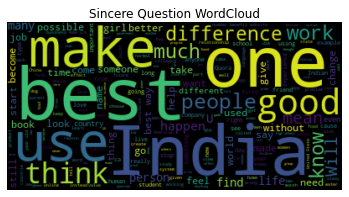

In [19]:
sincere = train_df[train_df.target == 0]

sincere_wordcloud = WordCloud().generate(' '.join(sincere['wordcloud']))

plt.figure()
plt.imshow(sincere_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Sincere Question WordCloud")
plt.show()

Do the same for the toxic/troll content

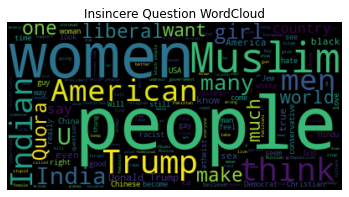

In [20]:
insincere = train_df[train_df.target == 1]

insincere_wordcloud = WordCloud().generate(' '.join(insincere['wordcloud']))

plt.imshow(insincere_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Insincere Question WordCloud")
plt.show()

TODO: comment on the full data wordclouds

## Sentiment analysis

In [21]:
from textblob import TextBlob

In [22]:
train_df["polarity"] = train_df['wordcloud'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_df["subjectivity"] = train_df['wordcloud'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
train_df.head()


,qid,question_text,target,processed,stemmed,wordcloud,polarity,subjectivity
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[How, Quebec, nationalists, see, province, nat...","[how, quebec, nationalist, see, provinc, nation]",How Quebec nationalists see province nation,0.0,0.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[Do, adopted, dog, would, encourage, people, a...","[Do, adopt, dog, would, encourag, peopl, adopt...",Do adopted dog would encourage people adopt shop,0.0,0.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[Why, velocity, affect, time, Does, velocity, ...","[whi, veloc, affect, time, doe, veloc, affect,...",Why velocity affect time Does velocity affect ...,0.0,0.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[How, Otto, von, Guericke, used, Magdeburg, he...","[how, otto, von, guerick, use, magdeburg, hemi...",How Otto von Guericke used Magdeburg hemispheres,0.0,0.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[Can, I, convert, montra, helicon, D, mountain...","[can, I, convert, montra, helicon, D, mountain...",Can I convert montra helicon D mountain bike c...,0.0,0.0


Text(0.5, 1.0, 'Question polarity')

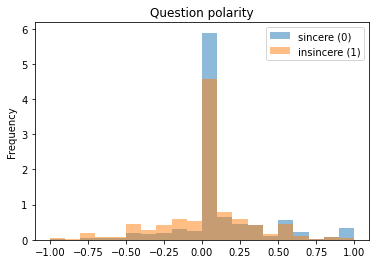

In [23]:
train_df[train_df.target == 0]["polarity"].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5)
train_df[train_df.target == 1]["polarity"].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5)
plt.legend(labels=["sincere (0)", "insincere (1)"])
plt.title("Question polarity")


Text(0.5, 1.0, 'Question Subjectivity')

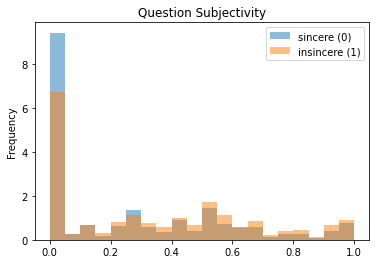

In [24]:
train_df[train_df.target == 0]["subjectivity"].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5)
train_df[train_df.target == 1]["subjectivity"].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5)
plt.legend(labels=["sincere (0)", "insincere (1)"])
plt.title("Question Subjectivity")

## Readability

In [25]:
import textstat
temp_df = train_df.sample(n=10000)

In [26]:
train_df['readability']=train_df['question_text'].apply(lambda x: textstat.text_standard(x, float_output=True))
train_df.head()

,qid,question_text,target,processed,stemmed,wordcloud,polarity,subjectivity,readability
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[How, Quebec, nationalists, see, province, nat...","[how, quebec, nationalist, see, provinc, nation]",How Quebec nationalists see province nation,0.0,0.0,7.0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[Do, adopted, dog, would, encourage, people, a...","[Do, adopt, dog, would, encourag, peopl, adopt...",Do adopted dog would encourage people adopt shop,0.0,0.0,6.0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[Why, velocity, affect, time, Does, velocity, ...","[whi, veloc, affect, time, doe, veloc, affect,...",Why velocity affect time Does velocity affect ...,0.0,0.0,11.0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[How, Otto, von, Guericke, used, Magdeburg, he...","[how, otto, von, guerick, use, magdeburg, hemi...",How Otto von Guericke used Magdeburg hemispheres,0.0,0.0,9.0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[Can, I, convert, montra, helicon, D, mountain...","[can, I, convert, montra, helicon, D, mountain...",Can I convert montra helicon D mountain bike c...,0.0,0.0,7.0


Text(0.5, 1.0, 'Question Readability')

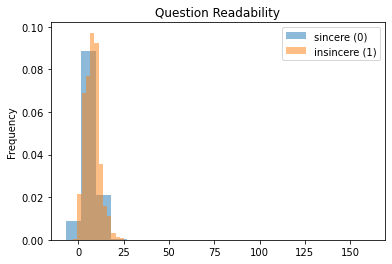

In [27]:
train_df[train_df.target == 0]["readability"].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5)
train_df[train_df.target == 1]["readability"].plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5)
plt.legend(labels=["sincere (0)", "insincere (1)"])
plt.title("Question Readability")

In [29]:
train_df.to_csv("exotic_features.csv")